### Imports and data files

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



# Specify folders
dir_diagrams = Path(r'C:\Users\rldek\Mijn Drive (r.l.dekkers@tilburguniversity.edu)\Thesis\Code\thesis-msc-data-science\diagrams')
dir_data = Path(r'C:\Users\rldek\Mijn Drive (r.l.dekkers@tilburguniversity.edu)\Thesis\Code\thesis-msc-data-science\data')

gwsd = pd.read_csv(dir_data/'GWSD.tsv', sep='\t', index_col=0)
articles = pd.read_pickle(dir_data/'articles.pkl')

### Matplotlib setup

In [2]:
plt.rcParams["font.family"] = "Palatino Linotype" # default 'sans-serif', see code: matplotlib.font_manager.get_font_names()
plt.rcParams["font.size"] = 18
plt.rcParams['figure.dpi'] = 200 # size for display in notebook. For saving, use dpi=600

### Label counts

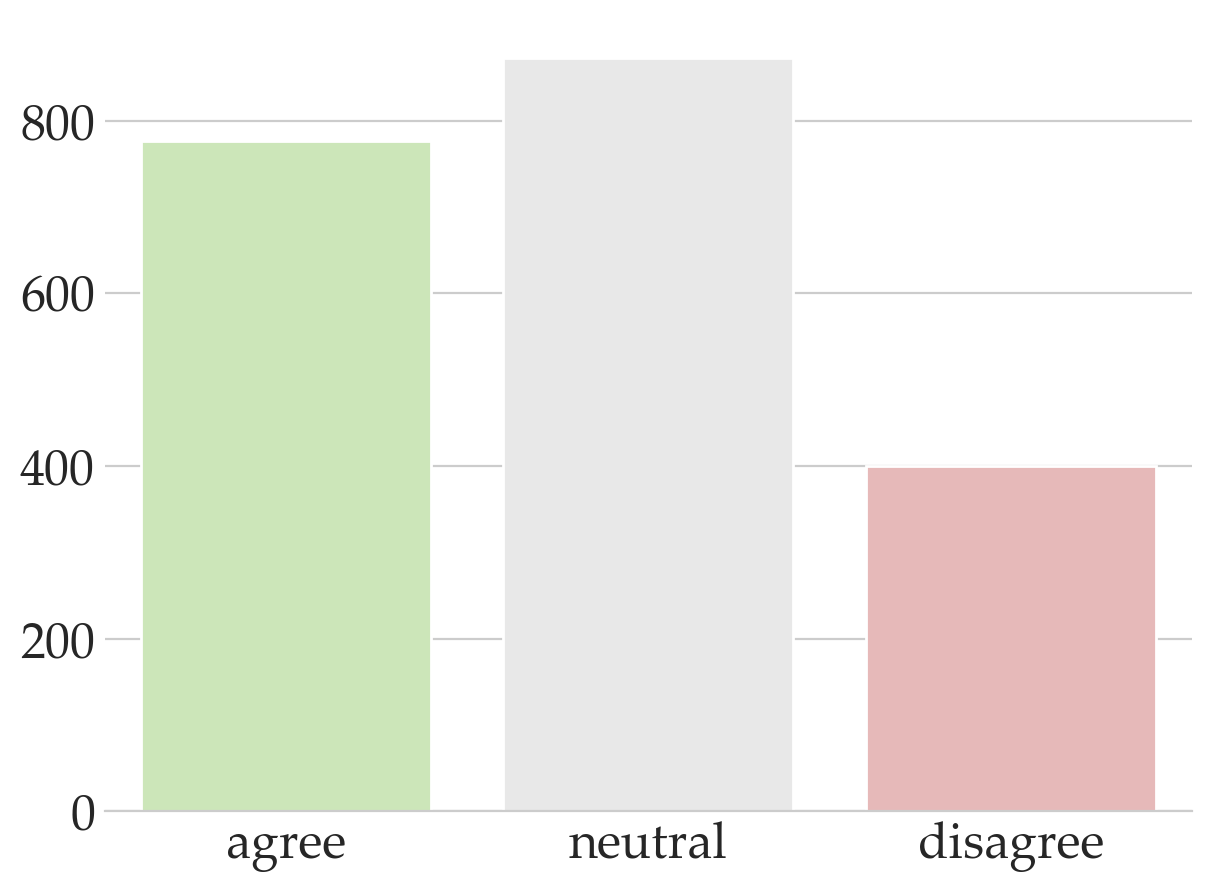

In [16]:
valc = articles['label'].value_counts()

fig, ax = plt.subplots(1,1)
sns.barplot(ax=ax,
            x=valc.index,
            y=valc.values,
            palette=['#cbedb2', '#e8e8e8', '#edb2b2'],
            order=['agree', 'neutral', 'disagree'],
            zorder=3) 
for spine in ['left', 'right', 'top']:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_zorder(5)
# ax.set_title("Label Frequency")
# fig.suptitle("Label Frequency")

ax.set_xlabel('')
ax.grid(axis='y', zorder=0)
ax.tick_params(length=0)

plt.tight_layout()
plt.savefig(dir_diagrams/'label_freq.svg', dpi=600)

##### Train-test split

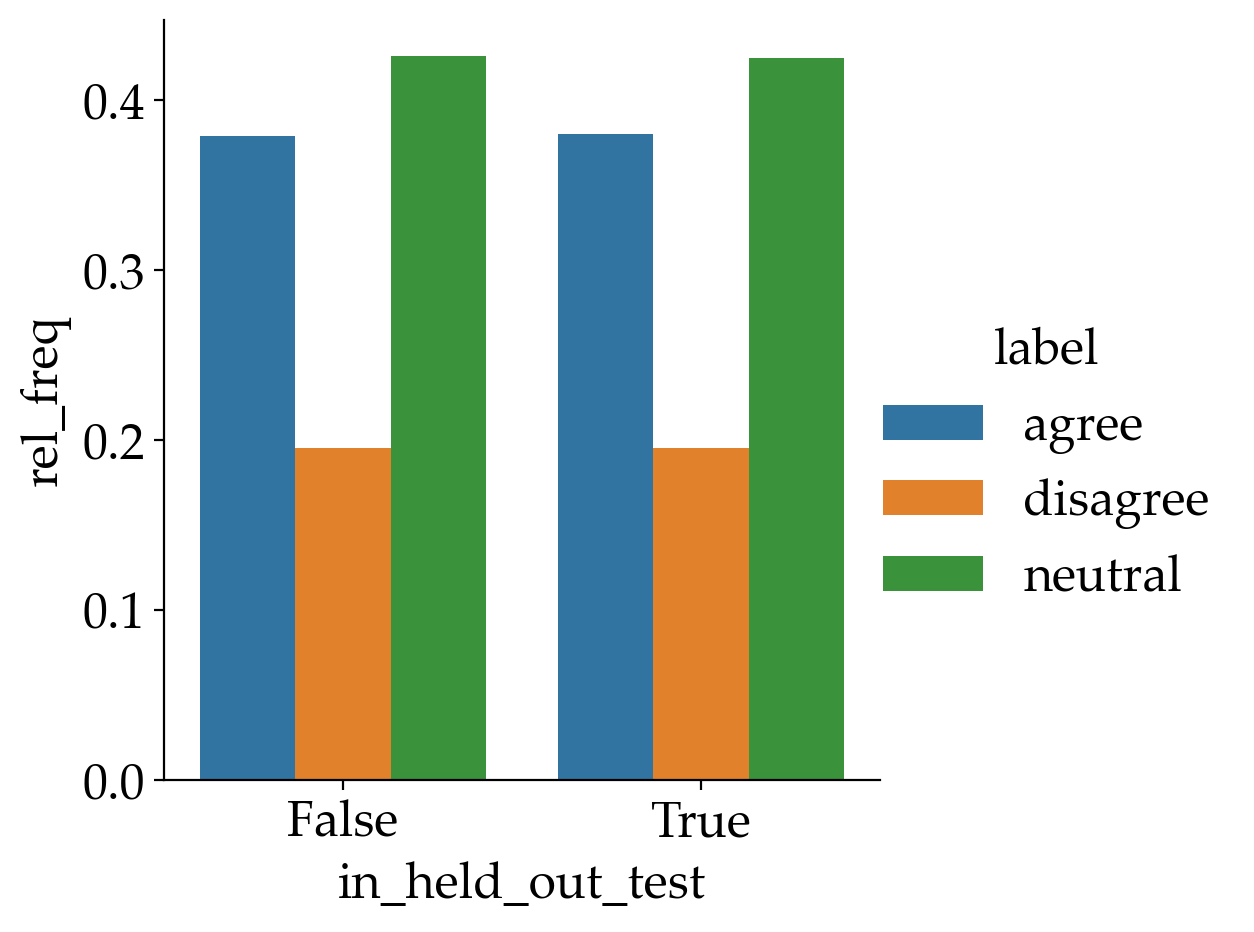

In [81]:
count_per_set = articles.groupby(['label', 'in_held_out_test']).size().reset_index(name='count')
total_per_set = articles.groupby('in_held_out_test').size().reset_index(name='total_count')

counts = pd.merge(count_per_set, total_per_set, on='in_held_out_test')
counts['rel_freq'] = counts['count'] / counts['total_count']

sns.catplot(kind = 'bar',
            data=counts,
            x='in_held_out_test',
            y='rel_freq',
            hue='label')

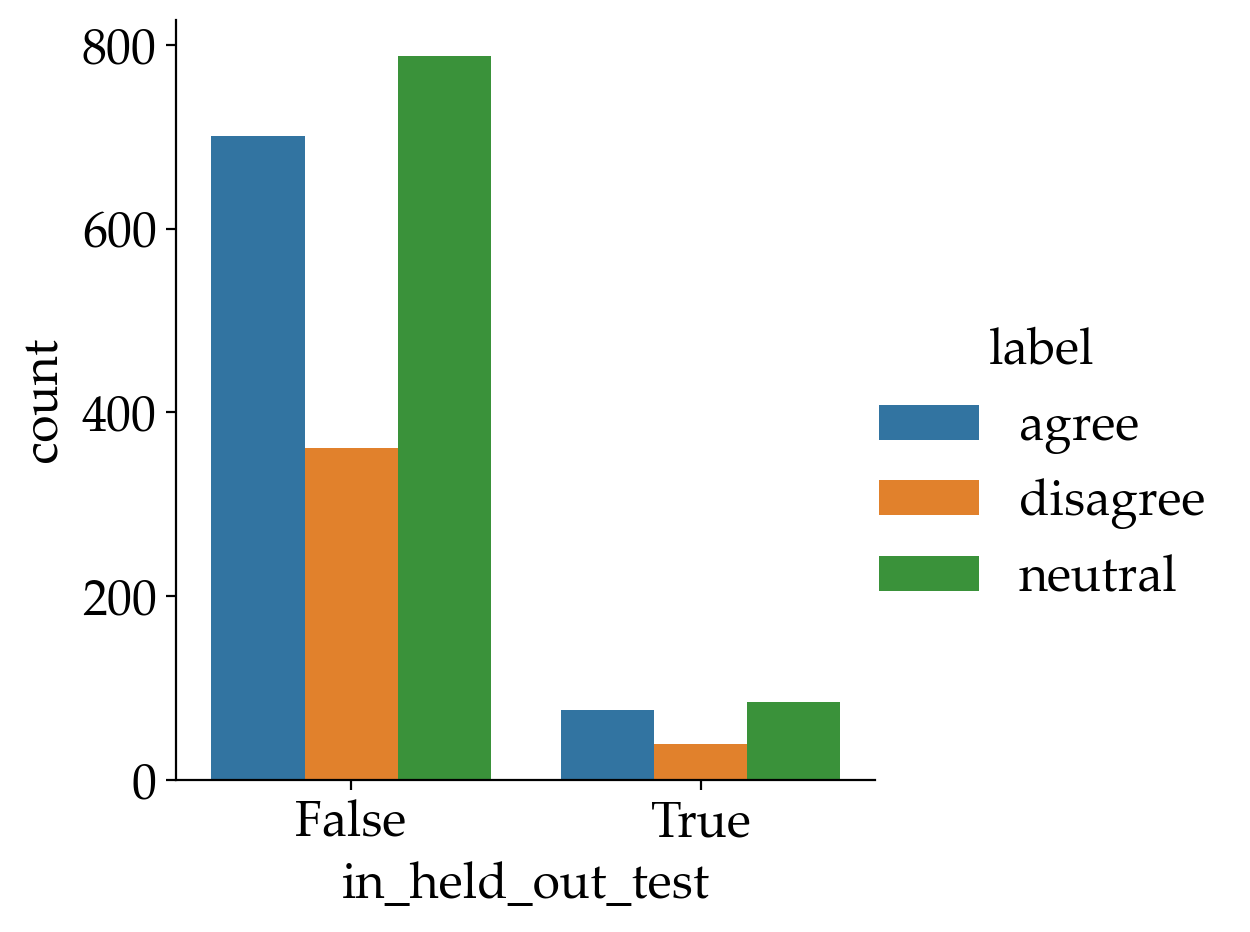

In [80]:


dist_per_subset = articles.groupby(['label', 'in_held_out_test']).size().reset_index(name='count')
sns.catplot(kind = 'bar',
            data=dist_per_subset,
            x='in_held_out_test',
            y='count',
            hue='label')

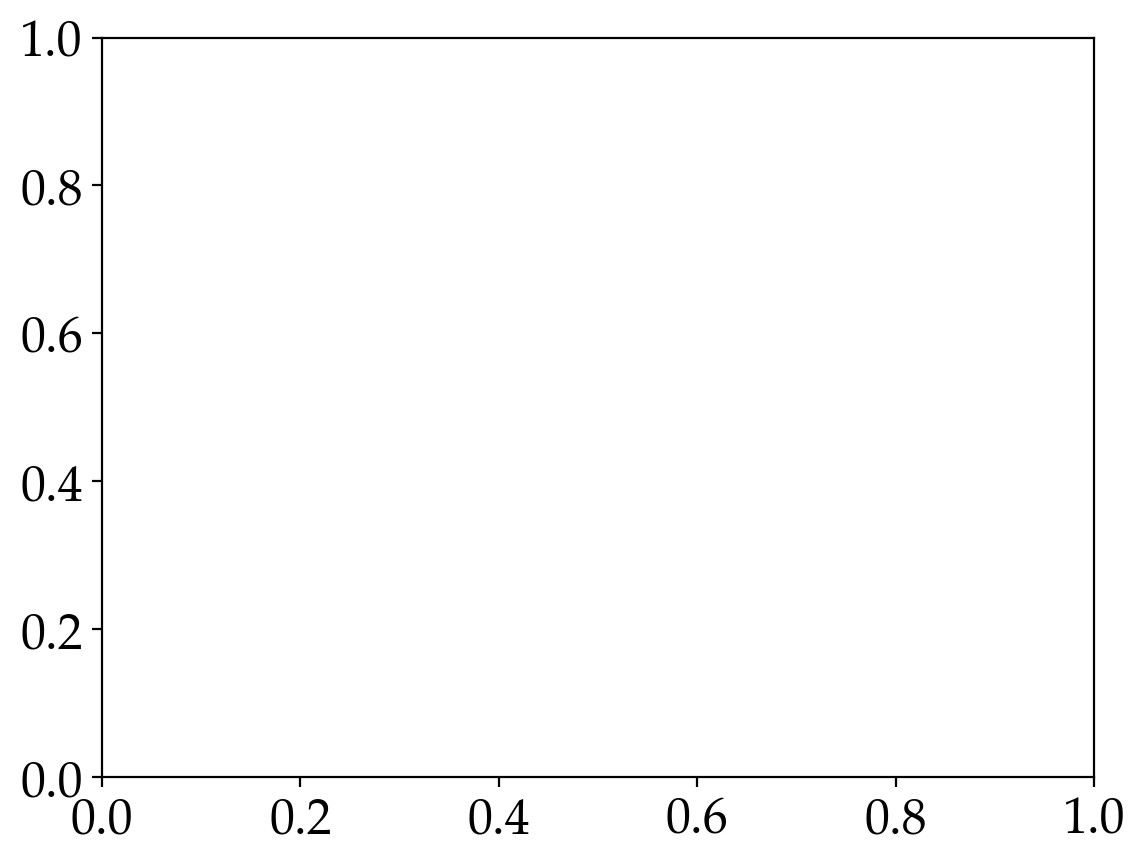

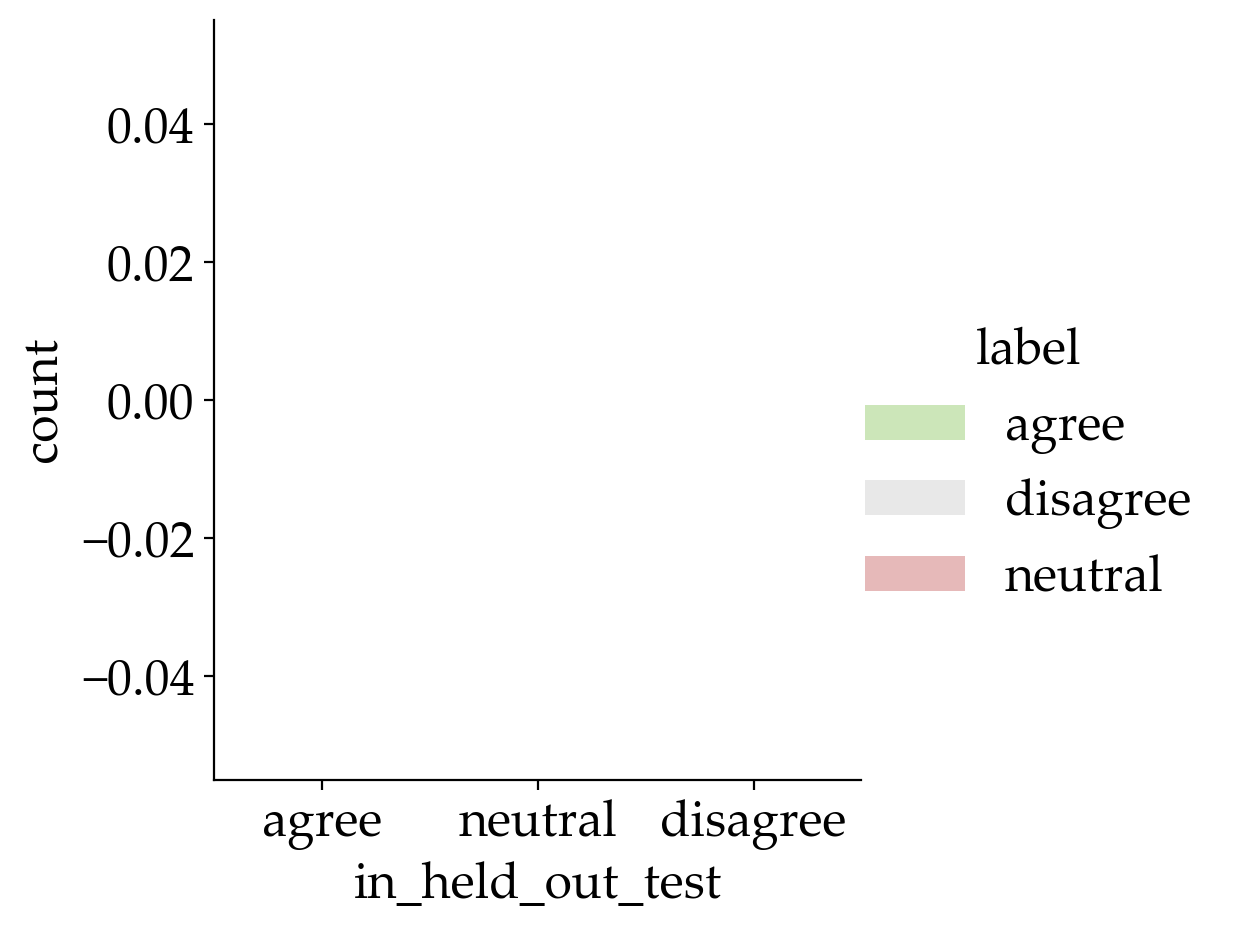

In [73]:
dist_per_subset = articles.groupby(['label', 'in_held_out_test']).size().reset_index(name='count')

fig, ax = plt.subplots(1,1)
sns.catplot(kind='bar',
            data=dist_per_subset,
            x='in_held_out_test',
            y='count',
            hue='label',
            palette=['#cbedb2', '#e8e8e8', '#edb2b2'],
            order=['agree', 'neutral', 'disagree'],
            zorder=3) 
# for spine in ['left', 'right', 'top']:
#     ax.spines[spine].set_visible(False)
# ax.spines['bottom'].set_zorder(5)
# ax.set_title("Label Frequency")
# fig.suptitle("Label Frequency")

# ax.set_xlabel('')
# ax.grid(axis='y', zorder=0)
# ax.tick_params(length=0)

# plt.tight_layout()
# plt.savefig(dir_diagrams/'label_freq.svg', dpi=600)

### Domain counts

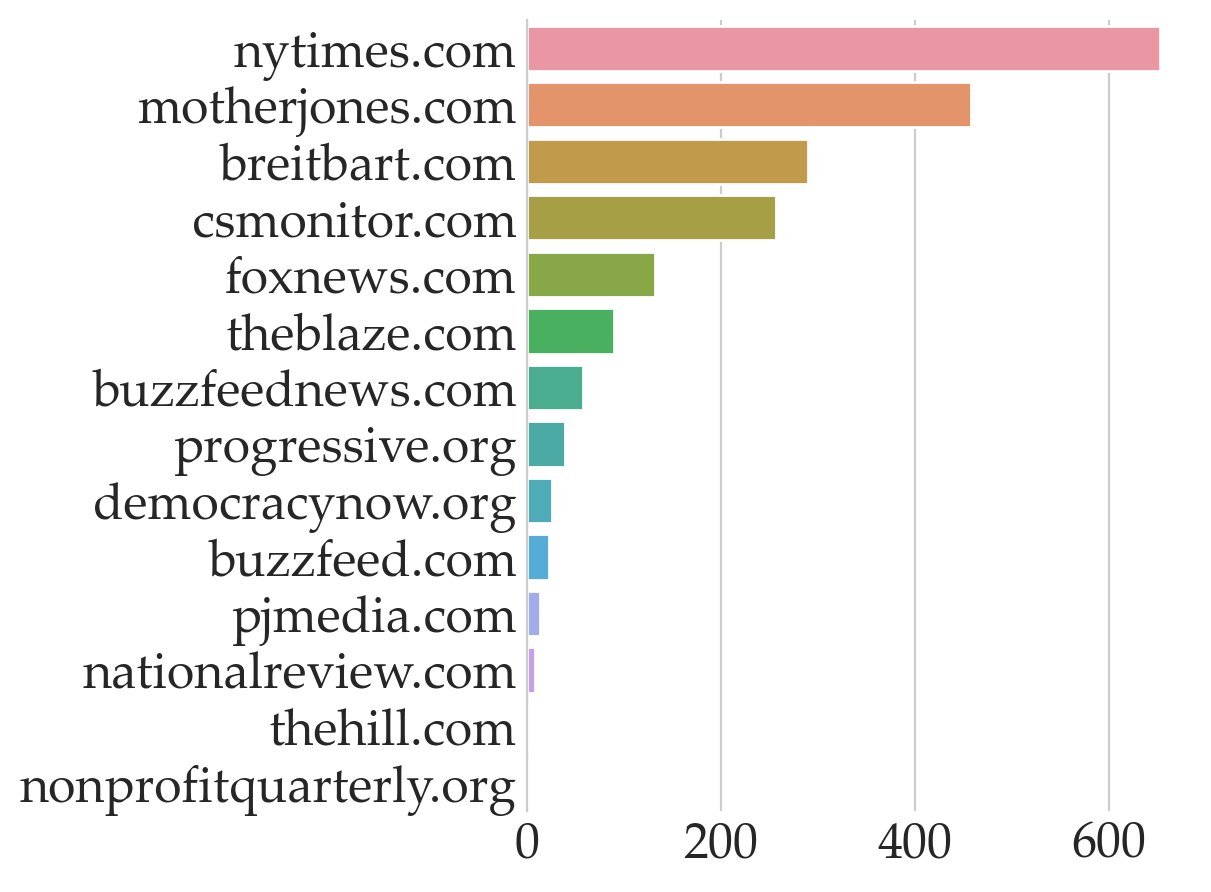

In [17]:
# Note: all nytimes.com subdomains are grouped under nytimes.com
valc = articles['domain'].apply(lambda s: 'nytimes.com' if 'nytimes.com' in s else s).value_counts()

fig, ax = plt.subplots(1,1)
sns.barplot(ax=ax,
            y=valc.index,
            x=valc.values,
            zorder=3)
for spine in ['right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_zorder(3)

# plt.suptitle("Domain Frequency")

ax.set_ylabel('')

ax.grid(axis='x', zorder=0)
ax.tick_params(length=0)

plt.tight_layout()
plt.savefig(dir_diagrams/'domain_freq.svg', dpi=600)

### Labels per domain

In [24]:
articles['domain'].apply(lambda s: 'nytimes.com' if 'nytimes.com' in s else s)

5           foxnews.com
6           thehill.com
7         breitbart.com
8         breitbart.com
9           nytimes.com
             ...       
2295        nytimes.com
2296    motherjones.com
2297        nytimes.com
2298        nytimes.com
2299    motherjones.com
Name: domain, Length: 2050, dtype: object

In [26]:
counts.sort_index

label,agree,disagree,neutral
domain,,,
breitbart.com,75,113,102
buzzfeed.com,8,4,11
buzzfeednews.com,33,7,18
csmonitor.com,91,29,137
democracynow.org,7,6,13
foxnews.com,37,22,73
motherjones.com,181,107,170
nationalreview.com,2,3,3
nonprofitquarterly.org,1,0,0


### More ideas:
* stance distribution per domain
* common words per label (word cloud)
* inter-rater agreement
* (stance over time (per outlet))
* correlation between sentiment analysis and stance?
* topic modeling; which topics per stance?
* NER per stance